In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [38]:
df = pd.read_csv('youtube_dislike_dataset.csv')

In [39]:
#1.Import required libraries and read the provided dataset (youtube_dislike_dataset.csv) and retrieve top5 and bottom 5 records.
df.head(5)

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...


In [40]:
df.tail(5)

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...
37421,zzxPZwaA-8w,Gareth Bale brace secures dramatic comeback on...,UCEg25rdRZXg32iwai6N6l0w,Tottenham Hotspur,2021-05-23 21:00:31,2252090,34063,868,2004,Spurs Tottenham Hotspur Tottenham Leicester ...,Two minute highlights from Tottenham Hotspur's...,Thank you Kane for everything you have given t...


In [41]:
df.shape

(37422, 12)

In [42]:
df.dtypes

video_id         object
title            object
channel_id       object
channel_title    object
published_at     object
view_count        int64
likes             int64
dislikes          int64
comment_count     int64
tags             object
description      object
comments         object
dtype: object

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB


In [44]:
df.duplicated().sum()

0

In [45]:
df.isnull().mean()*100

video_id         0.000000
title            0.000000
channel_id       0.000000
channel_title    0.000000
published_at     0.000000
view_count       0.000000
likes            0.000000
dislikes         0.000000
comment_count    0.000000
tags             0.000000
description      0.000000
comments         0.422212
dtype: float64

In [46]:
#3 drop the missing values with mode
df.drop(columns=['comments'], inplace=True)

In [47]:
#Check the statistical summary of both numerical and categorical columns and write your inferences.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
view_count,37422.0,5.697838e+06,2.426622e+07,20368.0,512297.0,1319078.5,3670231.25,1.322797e+09
likes,37422.0,1.668147e+05,5.375670e+05,0.0,13233.5,42330.5,130469.75,3.183768e+07
dislikes,37422.0,4.989862e+03,3.070824e+04,0.0,281.0,796.0,2461.75,2.397733e+06
comment_count,37422.0,9.924930e+03,1.171003e+05,0.0,900.0,2328.0,6184.00,1.607103e+07


In [48]:
df.describe(include='object').T

,count,unique,top,freq
video_id,37422,37422,--0bCF-iK2E,1
title,37422,37113,www,21
channel_id,37422,10961,UCNAf1k0yIjyGu3k9BwAg3lg,533
channel_title,37422,10883,Sky Sports Football,533
published_at,37422,36772,2020-10-16 04:00:10,6
tags,37422,28799,,3817
description,37422,35630,,589


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
view_count,37422.0,5.697838e+06,2.426622e+07,20368.0,512297.0,1319078.5,3670231.25,1.322797e+09
likes,37422.0,1.668147e+05,5.375670e+05,0.0,13233.5,42330.5,130469.75,3.183768e+07
dislikes,37422.0,4.989862e+03,3.070824e+04,0.0,281.0,796.0,2461.75,2.397733e+06
comment_count,37422.0,9.924930e+03,1.171003e+05,0.0,900.0,2328.0,6184.00,1.607103e+07


**Inference**

**From the both numeric and categorical variables we can observe no null values after removing the comments column and in the category columns we can see how many unique values and in the numeric colums we can see the means and standard deviation adn the quartiles Q1,Q2,Q3 range and max along with min values in the each columns**

In [50]:
#Convert datatype of column published_at from object to pandas datetime.
df["published_at"]= pd.to_datetime(df["published_at"])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       37422 non-null  object        
 1   title          37422 non-null  object        
 2   channel_id     37422 non-null  object        
 3   channel_title  37422 non-null  object        
 4   published_at   37422 non-null  datetime64[ns]
 5   view_count     37422 non-null  int64         
 6   likes          37422 non-null  int64         
 7   dislikes       37422 non-null  int64         
 8   comment_count  37422 non-null  int64         
 9   tags           37422 non-null  object        
 10  description    37422 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 3.1+ MB


In [52]:
#Create a new column as 'published_month' using the column published_at (display the months only)
df["published_at"]

0       2021-07-01 10:00:00
1       2021-06-10 16:00:00
2       2021-09-20 01:03:32
3       2021-03-03 10:00:17
4       2021-12-07 13:00:00
                ...        
37417   2021-02-12 05:03:49
37418   2021-01-16 05:39:05
37419   2021-06-02 09:00:10
37420   2020-10-20 20:59:30
37421   2021-05-23 21:00:31
Name: published_at, Length: 37422, dtype: datetime64[ns]

In [53]:
df['published_month'] = df['published_at'].dt.month

In [54]:
df

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,7
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",6
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,9
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,3
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,12
...,...,...,...,...,...,...,...,...,...,...,...,...
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",2
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,1
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,6
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,10


In [55]:
df['published_month'].unique()

array([ 7,  6,  9,  3, 12, 10,  8,  4,  5, 11,  2,  1], dtype=int64)

In [56]:
df.columns

Index(['video_id', 'title', 'channel_id', 'channel_title', 'published_at',
       'view_count', 'likes', 'dislikes', 'comment_count', 'tags',
       'description', 'published_month'],
      dtype='object')

In [57]:
#Replace the numbers in the column published_month as names of the months i,e., 1 as 'Jan', 2 as 'Feb'
#and so on.....
df['published_month'] = df['published_at'].dt.strftime('%B')
df

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,July
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",June
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,September
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,March
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,December
...,...,...,...,...,...,...,...,...,...,...,...,...
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",February
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,January
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,June
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,October


In [58]:
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,July
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",June
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,September
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,March
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,December


In [61]:
#Find the number of videos published each month and arrange the months in a decreasing order based
#on the video count.
df.groupby('published_month')['video_id'].count().sort_values(ascending = False)

published_month
October      4991
September    4880
November     4851
August       4262
December     3072
July         2340
June         2316
March        2258
February     2137
April        2126
January      2108
May          2081
Name: video_id, dtype: int64

In [62]:
#Find the count of unique video_id, channel_id and channel_title.
print(df['video_id'].nunique())
print(df['channel_id'].nunique())
print(df['channel_title'].nunique())

37422
10961
10883


In [63]:
#Find the top10 channel names having the highest number of videos in the dataset 
top10 = df.groupby('channel_title')['video_id'].count().sort_values(ascending = False).head(10)
print(f'top10 channel names: {top10}')

top10 channel names: channel_title
Sky Sports Football    533
The United Stand       301
BT Sport               246
NBA                    209
NFL                    162
WWE                    122
SSSniperWolf            99
SSundee                 98
FORMULA 1               87
NHL                     86
Name: video_id, dtype: int64


In [64]:
#bottom10 having lowest number of videos.
below10 = df.groupby('channel_title')['video_id'].count().sort_values(ascending = True).head(10)
print(f'below10 channel names: {below10}')

below10 channel names: channel_title
   SilverName                   1
Mini Muka                       1
Mini Ladd                       1
MindYourLogic                   1
Mind Body Tonic With Dr Sita    1
Mimi Ar                         1
Millyz                          1
Milkair                         1
Milissa Grande                  1
MikuruSong                      1
Name: video_id, dtype: int64


In [65]:
#Find the title of the video which has the maximum number of likes 
df['likes'].max()

31837675

In [66]:
df['likes'].min()

0

In [67]:
#title of the video having maximum likes and write your inferences.
df.groupby('title')['likes'].max().sort_values(ascending = False).head(1)

title
BTS () 'Dynamite' Official MV    31837675
Name: likes, dtype: int64

In [68]:
#title of the video having minimum likes and write your inferences.
df.groupby('title')['likes'].min().sort_values(ascending = True).head(1)

title
Kim Kardashian's Must-See Moments on "Saturday Night Live" | E! News    0
Name: likes, dtype: int64

**Inference**

**If we observe the above quesn we got the max likes fro BTS() Dynamite' Official which has 31837675 likes and min likes is for Kim Kardashian's Must-See Moments on "Saturday Night Live" which has 0 likes**

In [69]:
#Find the title of the video which has the maximum number of dislikes 
df.groupby('title')['dislikes'].max().sort_values(ascending = False).head(1)

title
Cuties | Official Trailer | Netflix    2397733
Name: dislikes, dtype: int64

In [70]:
#title of the video having minimum dislikes and write your inferences.
df.groupby('title')['dislikes'].min().sort_values(ascending = True).head(1)

title
Kim Kardashian's Must-See Moments on "Saturday Night Live" | E! News    0
Name: dislikes, dtype: int64

**Inference**

**If we observe the above quesn we got the max dislikes for Cuties which has 297733 dislikes and min dislikes is for  which Kim Kardashian's Must-See Moments on "Saturday Night Live" has 0 dislikes**

In [71]:
#Does the number of views have any effect on how many people disliked the video? Support your 
#answer with a metric and a plot.
df[['view_count','dislikes']].corr()

,view_count,dislikes
view_count,1.000000,0.684469
dislikes,0.684469,1.000000


<AxesSubplot:xlabel='view_count', ylabel='dislikes'>

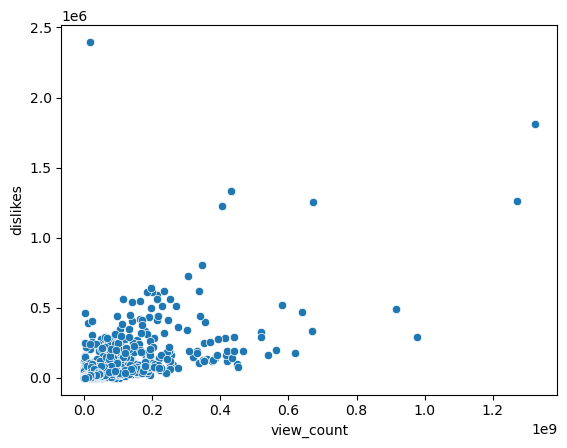

In [72]:
sns.scatterplot(data = df,x = 'view_count',y='dislikes')

In [73]:
#Display all the information about the videos that were published in January, and mention the count of
#videos that were published in January.

In [75]:
df['published_month']

0             July
1             June
2        September
3            March
4         December
           ...    
37417     February
37418      January
37419         June
37420      October
37421          May
Name: published_month, Length: 37422, dtype: object

In [76]:
videos = df[df['published_month'] == 'January']
videos

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,published_month
27,-2Gwm7QfBnE,Q&A With Naisha,UCYwNMbogQFzMccPSuy-pPWg,MianTwins,2021-01-21 00:05:47,872372,38626,239,621,,Hey Guys!!! this has been the most requested v...,January
48,-4sfXSHSxzA,SURPRISING BRENT WITH HIS TIKTOK CRUSH!!,UCPpATKqmMV-CNRNWYaDUwiA,Alexa Rivera,2021-01-16 21:40:04,6504784,262477,5779,7907,,He had no idea! Thank you guys so much for wat...,January
95,-AJD1Fc5rpQ,WE ARE HAVING A BABY! | finding out i'm pregna...,UCVsTboAhpnuL6j-tDePvNwQ,Tess Christine,2021-01-03 21:53:48,533084,38965,119,1650,,I am so happy to tell you that I am pregnant!!...,January
103,-AuJiwjsmWk,Do Ugly Foods Taste Worse? Taste Test,UCzpCc5n9hqiVC7HhPwcIKEg,Good Mythical MORE,2021-01-19 11:00:01,1057077,22526,531,773,gmm good mythical morning rhettandlink rhett a...,"Today, we're doing a blind taste test to deter...",January
182,-JhqO2KWr5U,Schlatt gets fit,UCWZp4y1jqBuvLtiyxSs_ZBw,Big guy,2021-01-24 22:50:57,1724965,119431,325,1578,jschlatt big guy jschlatt highlights schlatt j...,#jschlatt #schlatt #bigguy #short,January
...,...,...,...,...,...,...,...,...,...,...,...,...
37300,zmzFL5bG-jc,DEVINE MON PERSONNAGE AVANT AKINATOR ! (c'est ...,UCIlr3byh6wmXgcPx_Tm9Ocw,Piwerre,2021-01-16 16:12:19,670357,54462,832,1249,Piwerre frere de michou crouton among us devin...,Discord Piwerre : https://discord.gg/QBduPgAA...,January
37329,zpzjex7qwrA,Lampard Sacked Within Days Rorys Misery | Chel...,UCkD-ZOixI0a9FjIExDsHsbg,The Kick Off,2021-01-03 20:13:49,428646,12060,296,1505,Premier league Chelsea chelsea 1-3 Man City Ch...,The Kick Off watched Manchester City destroy C...,January
37345,zqyv-B6mnBM,Lil Wayne - Ain't Got Time (Audio),UCO9zJy7HWrIS3ojB4Lr7Yqw,Lil Wayne,2021-01-21 05:00:10,2238244,58925,2365,5539,lil wayne weezy weezy wednesday wayne carter y...,"Official audio for Lil Wayne ""Ain't Got Time"",...",January
37383,zwfu1-24T7Q,PRADA Cup Day 1 | Full Race Replay | PRADA Cup...,UCo15ZYO_XDRU9LI30OPtxAg,America's Cup,2021-01-15 04:07:55,317382,2008,83,192,America's Cup Americas Cup AC36 AC75 Presented...,"The opening day of the PRADA Cup in Auckland, ...",January


In [77]:
videos.describe()

,view_count,likes,dislikes,comment_count
count,2.108000e+03,2.108000e+03,2108.000000,2.108000e+03
mean,4.976449e+06,1.315030e+05,3614.568311,8.923385e+03
std,2.055331e+07,3.886887e+05,13946.711333,3.664662e+04
min,2.845000e+04,2.800000e+01,3.000000,0.000000e+00
25%,4.322335e+05,1.032400e+04,249.000000,8.747500e+02
50%,1.147500e+06,3.173900e+04,729.000000,2.328500e+03
75%,3.227483e+06,1.076512e+05,2243.250000,6.302000e+03
max,6.203274e+08,7.828036e+06,409144.000000,1.095119e+06


In [78]:
videos.shape[0]

2108